In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr
import scipy.stats
import string

### Velocity and kinematic flux profiles

In [2]:
### Read in velocity profile data
## Train data
u_train_mean = xr.open_dataset('u_train_mean.nc')
u_train_std = xr.open_dataset('u_train_std.nc')
v_train_mean = xr.open_dataset('v_train_mean.nc')
v_train_std = xr.open_dataset('v_train_std.nc')
w_train_mean = xr.open_dataset('w_train_mean.nc')
w_train_std = xr.open_dataset('w_train_std.nc')

## 81-hour test data
u_test_mean = xr.open_dataset('u_test_mean.nc')
u_test_std = xr.open_dataset('u_test_std.nc')
v_test_mean = xr.open_dataset('v_test_mean.nc')
v_test_std = xr.open_dataset('v_test_std.nc')
w_test_mean = xr.open_dataset('w_test_mean.nc')
w_test_std = xr.open_dataset('w_test_std.nc')

## Unconditional data
u_ucond_kl_mean = xr.open_dataset('u_ucond_kl_mean.nc')
v_ucond_kl_mean = xr.open_dataset('v_ucond_kl_mean.nc')
w_ucond_kl_mean = xr.open_dataset('w_ucond_kl_mean.nc')

u_ucond_kl_std = xr.open_dataset('u_ucond_kl_std.nc')
v_ucond_kl_std = xr.open_dataset('v_ucond_kl_std.nc')
w_ucond_kl_std = xr.open_dataset('w_ucond_kl_std.nc')

## Conditional data
u_ccond_kl_raaw_mean = xr.open_dataset('u_ccond_kl_raaw_mean.nc')
v_ccond_kl_raaw_mean = xr.open_dataset('v_ccond_kl_raaw_mean.nc')
w_ccond_kl_raaw_mean = xr.open_dataset('w_ccond_kl_raaw_mean.nc')

u_ccond_kl_raaw_std = xr.open_dataset('u_ccond_kl_raaw_std.nc')
v_ccond_kl_raaw_std = xr.open_dataset('v_ccond_kl_raaw_std.nc')
w_ccond_kl_raaw_std = xr.open_dataset('w_ccond_kl_raaw_std.nc')

In [3]:
### Read in kinematic flux profile data
## Train data
upvp_train = xr.open_dataset('upvp_train_profile.nc')
upwp_train = xr.open_dataset('upwp_train_profile.nc')
vpwp_train = xr.open_dataset('vpwp_train_profile.nc')

## Test data
upvp_test = xr.open_dataset('upvp_test_profile.nc')
upwp_test = xr.open_dataset('upwp_test_profile.nc')
vpwp_test = xr.open_dataset('vpwp_test_profile.nc')

## Unconditional data
upvp_ucond_kl = xr.open_dataset('upvp_ucond_kl.nc')
upwp_ucond_kl = xr.open_dataset('upwp_ucond_kl.nc')
vpwp_ucond_kl = xr.open_dataset('vpwp_ucond_kl.nc')

## Conditional data
upvp_ccond_kl_raaw = xr.open_dataset('upvp_ccond_kl_raaw.nc')
upwp_ccond_kl_raaw = xr.open_dataset('upwp_ccond_kl_raaw.nc')
vpwp_ccond_kl_raaw = xr.open_dataset('vpwp_ccond_kl_raaw.nc')

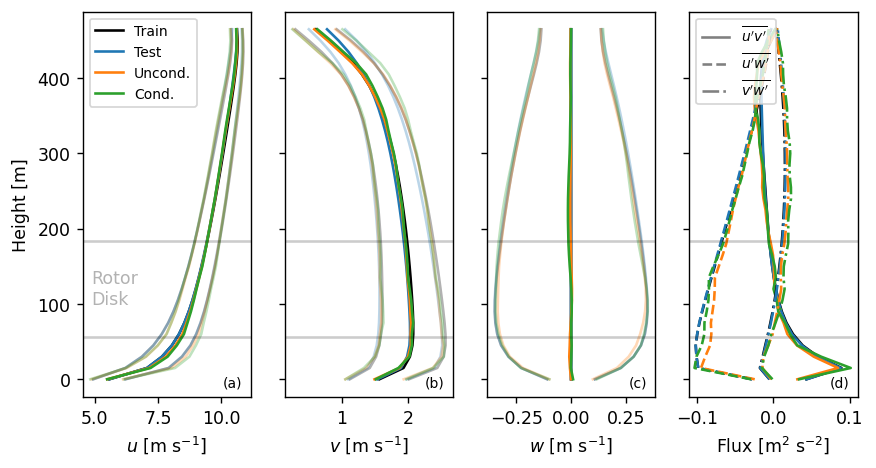

In [4]:
### Plot data
fig, ax = plt.subplots(1, 4, figsize=(8,4), dpi=125, sharey=True)

## ~~~~~~~~~~~~ Velocities ~~~~~~~~~~~~
## u
ax[0].plot(u_train_mean['u'], u_train_mean['z'], color='k', label='Train')
ax[0].plot(u_train_mean['u']+u_train_std['u'], u_train_mean['z'], color='k', alpha=0.3)
ax[0].plot(u_train_mean['u']-u_train_std['u'], u_train_mean['z'], color='k', alpha=0.3)

ax[0].plot(u_test_mean['u'], u_test_mean['z'], color='C0', label='Test')
ax[0].plot(u_test_mean['u']+u_test_std['u'], u_test_mean['z'], color='C0', alpha=0.3)
ax[0].plot(u_test_mean['u']-u_test_std['u'], u_test_mean['z'], color='C0', alpha=0.3)

ax[0].plot(u_ucond_kl_mean['u_kl'], u_ucond_kl_mean['z'], color='C1', label='Uncond.')
ax[0].plot(u_ucond_kl_mean['u_kl']+u_ucond_kl_std['u_kl'], u_ucond_kl_mean['z'], color='C1', alpha=0.3)
ax[0].plot(u_ucond_kl_mean['u_kl']-u_ucond_kl_std['u_kl'], u_ucond_kl_mean['z'], color='C1', alpha=0.3)

ax[0].plot(u_ccond_kl_raaw_mean['u_kl'], u_ccond_kl_raaw_mean['z'], color='C2', label='Cond.')
ax[0].plot(u_ccond_kl_raaw_mean['u_kl']+u_ccond_kl_raaw_std['u_kl'], u_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)
ax[0].plot(u_ccond_kl_raaw_mean['u_kl']-u_ccond_kl_raaw_std['u_kl'], u_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)

## v
ax[1].plot(v_train_mean['v'], v_train_mean['z'], color='k', label='Train')
ax[1].plot(v_train_mean['v']+v_train_std['v'], v_train_mean['z'], color='k', alpha=0.3)
ax[1].plot(v_train_mean['v']-v_train_std['v'], v_train_mean['z'], color='k', alpha=0.3)

ax[1].plot(v_test_mean['v'], v_test_mean['z'], color='C0', label='Test')
ax[1].plot(v_test_mean['v']+v_test_std['v'], v_test_mean['z'], color='C0', alpha=0.3)
ax[1].plot(v_test_mean['v']-v_test_std['v'], v_test_mean['z'], color='C0', alpha=0.3)

ax[1].plot(v_ucond_kl_mean['v_kl'], v_ucond_kl_mean['z'], color='C1', label='Uncond.')
ax[1].plot(v_ucond_kl_mean['v_kl']+v_ucond_kl_std['v_kl'], v_ucond_kl_mean['z'], color='C1', alpha=0.3)
ax[1].plot(v_ucond_kl_mean['v_kl']-v_ucond_kl_std['v_kl'], v_ucond_kl_mean['z'], color='C1', alpha=0.3)

ax[1].plot(v_ccond_kl_raaw_mean['v_kl'], v_ccond_kl_raaw_mean['z'], color='C2', label='Cond.')
ax[1].plot(v_ccond_kl_raaw_mean['v_kl']+v_ccond_kl_raaw_std['v_kl'], v_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)
ax[1].plot(v_ccond_kl_raaw_mean['v_kl']-v_ccond_kl_raaw_std['v_kl'], v_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)

## w
ax[2].plot(w_train_mean['w'], w_train_mean['z'], color='k', label='Train')
ax[2].plot(w_train_mean['w']+w_train_std['w'], w_train_mean['z'], color='k', alpha=0.3)
ax[2].plot(w_train_mean['w']-w_train_std['w'], w_train_mean['z'], color='k', alpha=0.3)

ax[2].plot(w_test_mean['w'], w_test_mean['z'], color='C0', label='Test')
ax[2].plot(w_test_mean['w']+w_test_std['w'], w_test_mean['z'], color='C0', alpha=0.3)
ax[2].plot(w_test_mean['w']-w_test_std['w'], w_test_mean['z'], color='C0', alpha=0.3)

ax[2].plot(w_ucond_kl_mean['w_kl'], w_ucond_kl_mean['z'], color='C1', label='Uncond.')
ax[2].plot(w_ucond_kl_mean['w_kl']+w_ucond_kl_std['w_kl'], w_ucond_kl_mean['z'], color='C1', alpha=0.3)
ax[2].plot(w_ucond_kl_mean['w_kl']-w_ucond_kl_std['w_kl'], w_ucond_kl_mean['z'], color='C1', alpha=0.3)

ax[2].plot(w_ccond_kl_raaw_mean['w_kl'], w_ccond_kl_raaw_mean['z'], color='C2', label='Cond.')
ax[2].plot(w_ccond_kl_raaw_mean['w_kl']+w_ccond_kl_raaw_std['w_kl'], w_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)
ax[2].plot(w_ccond_kl_raaw_mean['w_kl']-w_ccond_kl_raaw_std['w_kl'], w_ccond_kl_raaw_mean['z'], color='C2', alpha=0.3)

## ~~~~~~~~~~~ Fluxes ~~~~~~~~~~~
## upvp
ax[3].plot(upvp_train['upvp'],
           upvp_train['z'],
           color='k')
ax[3].plot(upvp_test['upvp'],
           upvp_test['z'],
           color='C0')
ax[3].plot(upvp_ucond_kl['upvp_kl'],
           upvp_ucond_kl['z'],
           color='C1')
ax[3].plot(upvp_ccond_kl_raaw['upvp_kl'],
           upvp_ccond_kl_raaw['z'],
           color='C2')

## upwp
ax[3].plot(upwp_train['upwp'],
           upwp_train['z'],
           color='k',
           ls='--')
ax[3].plot(upwp_test['upwp'],
           upwp_test['z'],
           color='C0',
           ls='--')
ax[3].plot(upwp_ucond_kl['upwp_kl'],
           upwp_ucond_kl['z'],
           color='C1',
           ls='--')
ax[3].plot(upwp_ccond_kl_raaw['upwp_kl'],
           upwp_ccond_kl_raaw['z'],
           color='C2',
           ls='--')

## vpwp
ax[3].plot(vpwp_train['vpwp'],
           vpwp_train['z'],
           color='k',
           ls='-.')
ax[3].plot(vpwp_test['vpwp'],
           vpwp_test['z'],
           color='C0',
           ls='-.')
ax[3].plot(vpwp_ucond_kl['vpwp_kl'],
           vpwp_ucond_kl['z'],
           color='C1',
           ls='-.')
ax[3].plot(vpwp_ccond_kl_raaw['vpwp_kl'],
           upwp_ccond_kl_raaw['z'],
           color='C2',
           ls='-.')

ax[3].plot([1, 1], [2, 2], color='gray', ls='-', label="$\overline{u'v'}$")
ax[3].plot([1, 1], [2, 2], color='gray', ls='--', label="$\overline{u'w'}$")
ax[3].plot([1, 1], [2, 2], color='gray', ls='-.', label="$\overline{v'w'}$")

ax[3].set_xlim(-0.11, 0.11)
ax[3].legend(loc='upper left', fontsize=8)


## Decorations
ax[0].legend(loc='upper left', fontsize=8)

ax[0].set_xlabel('$u$ [m s$^{-1}$]')
ax[1].set_xlabel('$v$ [m s$^{-1}$]')
ax[2].set_xlabel('$w$ [m s$^{-1}$]')
ax[3].set_xlabel('Flux [m$^2$ s$^{-2}$]')
ax[0].set_ylabel("Height [m]")

for axs in ax:
    axs.axhline(56.5, color='k', alpha=0.2)
    axs.axhline(183.5, color='k', alpha=0.2)

ax[0].text(0.05,
      0.24,
      'Rotor\nDisk',
      fontsize=10,
      transform = ax[0].transAxes,
      horizontalalignment='left',
      color='black',
      alpha=0.30)
    
for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.95,
          0.025,
          f'({letter})',
          fontsize=8,
          transform = axs.transAxes,
          horizontalalignment='right',
          color='black')

# plt.savefig('../figs/lesprofilesrevised.pdf', bbox_inches='tight')
    
plt.show()

### Velocity PDFs

In [5]:
### Load PDF daa
## Bins
umin_pdf = 6
umax_pdf = 12
ubins = np.linspace(umin_pdf, umax_pdf, 500)

vmin_pdf = -1.5
vmax_pdf = 3.5
vbins = np.linspace(vmin_pdf, vmax_pdf, 500)

wmin_pdf = -0.75
wmax_pdf = 0.75
wbins = np.linspace(wmin_pdf, wmax_pdf, 300)

## Train data
u_train_hist = np.load('u_train_hist.npy')
v_train_hist = np.load('v_train_hist.npy')
w_train_hist = np.load('w_train_hist.npy')

## Test data
u_test_hist = np.load('u_test_hist.npy')
v_test_hist = np.load('v_test_hist.npy')
w_test_hist = np.load('w_test_hist.npy')

## Unconditional data
u_ucond_kl_hist = np.load('u_ucond_kl_hist.npy')
v_ucond_kl_hist = np.load('v_ucond_kl_hist.npy')
w_ucond_kl_hist = np.load('w_ucond_kl_hist.npy')

## Conditional data
u_ccond_kl_raaw_hist = np.load('u_ccond_kl_raaw_hist.npy')
v_ccond_kl_raaw_hist = np.load('v_ccond_kl_raaw_hist.npy')
w_ccond_kl_raaw_hist = np.load('w_ccond_kl_raaw_hist.npy')

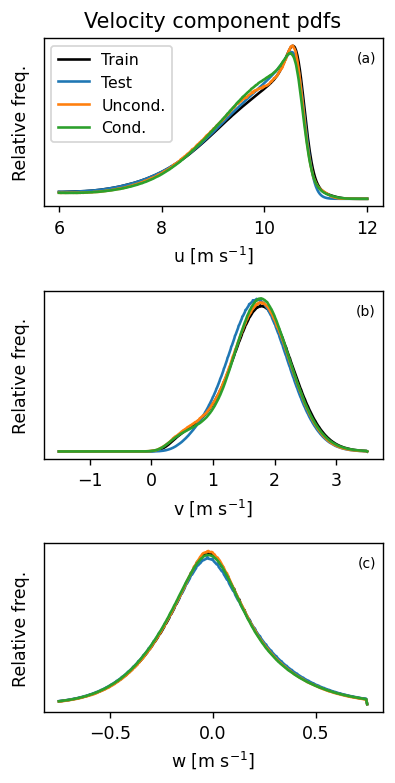

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(3.5,7), dpi=125)

# for axs in ax:
#     axs.set_box_aspect(1)

## Plot PDFs
ax[0].plot(ubins, u_train_hist, color='k', label='Train')
ax[0].plot(ubins, u_test_hist, color='C0', label='Test')
ax[0].plot(ubins, u_ucond_kl_hist, color='C1', label='Uncond.')
ax[0].plot(ubins, u_ccond_kl_raaw_hist, color='C2', label='Cond.')

ax[1].plot(vbins, v_train_hist, color='k', label='Train')
ax[1].plot(vbins, v_test_hist, color='C0', label='Test')
ax[1].plot(vbins, v_ucond_kl_hist, color='C1', label='Uncond.')
ax[1].plot(vbins, v_ccond_kl_raaw_hist, color='C2', label='Cond.')

ax[2].plot(wbins, w_train_hist, color='k', label='Test')
ax[2].plot(wbins, w_test_hist, color='C0', label='Test')
ax[2].plot(wbins, w_ucond_kl_hist, color='C1', label='Uncond.')
ax[2].plot(wbins, w_ccond_kl_raaw_hist, color='C2', label='Cond.')


## Decorate
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])


plt.subplots_adjust(hspace=0.5)
ax[0].set_xlabel("u [m s$^{-1}$]")
ax[1].set_xlabel("v [m s$^{-1}$]")
ax[2].set_xlabel("w [m s$^{-1}$]")
ax[0].set_title("Velocity component pdfs")
ax[0].set_ylabel("Relative freq.")
ax[1].set_ylabel("Relative freq.")
ax[2].set_ylabel("Relative freq.")
ax[0].legend(fontsize=9)

for axs, letter in zip(ax.flatten(), list(string.ascii_lowercase)):
    axs.text(0.98,
          0.86,
          f'({letter})',
          fontsize=8,
          transform = axs.transAxes,
          horizontalalignment='right',
          color='black')

# plt.savefig('../figs/lespdfsrevised.pdf', bbox_inches='tight')
    
plt.show()

### Spectra

In [7]:
# ### Load data
# ## Train data
# spectra_train = np.load('spectra_train.npy')

# ## Test data
# spectra_test = np.load('spectra_test.npy')

# ## Unconditional data
# spectra_ucond_kl = np.load('spectra_ucond_kl.npy')

# ## Conditional data
# spectra_ccond_kl = np.load('spectra_ccond_kl_raaw.npy')

# # Compute wavenumbers
# k_u = np.load('spectra_k_u.npy')

In [8]:
# fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=125)

# ax.plot(k_u, spectra_train, color='k', label='Train')
# ax.plot(k_u, spectra_test, color='C0', label='Test')
# ax.plot(k_u, spectra_ucond_kl, color='C1', label='Uncond.')
# ax.plot(k_u, spectra_ccond_kl, color='C2', label='Cond.')

# # ax.plot(k_u, up_k_bar_test, color='k', label='Test data')
# # ax.plot(k_u, up_k_bar_cont, color='C0', label='Cont')
# # # ax.plot(k_u, up_k_bar_contp, color='C1', label='Contp')
# # ax.plot(k_u, up_k_bar_kl, color='C2', label='KL')
# # # ax.plot(k_u, up_k_bar_klp, color='C3', label='KLp')

# ax.plot(k_u, k_u**(-5/3), ls='--', label='-5/3', color='k', alpha=0.5)

# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xlabel("$k_x$ [1/m]")
# ax.set_ylabel(r'$\Phi(k_x)$ at z=90 m')
# ax.legend()


# plt.show()

### Continuity

In [9]:
### Load data
## Bins
dmin_cont = -0.02
dmax_cont = 0.02
dbins_cont = np.linspace(dmin_cont, dmax_cont, 500)

## Train data
dudx_train_cont_hist = np.load('hist_dudx_train.npy')
dvdy_train_cont_hist = np.load('hist_dvdy_train.npy')
dwdz_train_cont_hist = np.load('hist_dwdz_train.npy')
div_train_cont_hist = np.load('hist_div_train.npy')

dudx_train_cont_hist = dudx_train_cont_hist.mean(axis=0)
dvdy_train_cont_hist = dvdy_train_cont_hist.mean(axis=0)
dwdz_train_cont_hist = dwdz_train_cont_hist.mean(axis=0)
div_train_cont_hist = div_train_cont_hist.mean(axis=0)

## Test data
dudx_test_cont_hist = np.load('hist_dudx_test.npy')
dvdy_test_cont_hist = np.load('hist_dvdy_test.npy')
dwdz_test_cont_hist = np.load('hist_dwdz_test.npy')
div_test_cont_hist = np.load('hist_div_test.npy')

## Unconditional data
dudx_ucond_kl_hist = np.load('dudx_ucond_kl_hist.npy')
dvdy_ucond_kl_hist = np.load('dvdy_ucond_kl_hist.npy')
dwdz_ucond_kl_hist = np.load('dwdz_ucond_kl_hist.npy')
div_ucond_kl_hist = np.load('div_ucond_kl_hist.npy')

## Conditional data
dudx_ccond_kl_hist = np.load('dudx_ccond_kl_raaw_hist.npy')
dvdy_ccond_kl_hist = np.load('dvdy_ccond_kl_raaw_hist.npy')
dwdz_ccond_kl_hist = np.load('dwdz_ccond_kl_raaw_hist.npy')
div_ccond_kl_hist = np.load('div_ccond_kl_raaw_hist.npy')

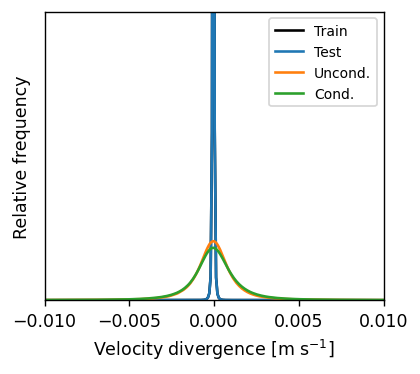

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3), dpi=125)

ax.plot(dbins_cont, div_train_cont_hist, color='k', label='Train')
ax.plot(dbins_cont, div_test_cont_hist, color='C0', label='Test')
ax.plot(dbins_cont, div_ucond_kl_hist, color='C1', label='Uncond.')
ax.plot(dbins_cont, div_ccond_kl_hist, color='C2', label='Cond.')

ax.set_xlim(-0.01, 0.01)
ax.set_ylim(0, 2000)
ax.set_yticks([])
ax.set_ylabel('Relative frequency')
ax.set_xlabel('Velocity divergence [m s$^{-1}$]')

ax.legend(fontsize=8)
# plt.savefig('../figs/lesmassjustdivrevised.pdf', bbox_inches='tight')

plt.show()